## Observations and Insights 

1. The study used a roughly equal amount of both female and male mice test subjects
2. Capomulin prevailed to be the most effective at reducing tumor size in mice tested
3. Using Capomulin as the drug regimen for mouse subect b128, the treatment drastically decreasd the size of the tumor, especially throughout days 25 - 35
4. There is a positive correlation (r = 0.84) between the average tumor volume (mm3) and the average weight (g) of the mice tested for the Capomulin treatment. 

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how= 'left', on=["Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
mice_count = len(mouse_study["Mouse ID"].unique())
mice_count

249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate
mouse_duplicates = mouse_duplicate.drop_duplicates()
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
clean_mouse
clean_mouse_df = pd.DataFrame(clean_mouse)
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(clean_mouse["Mouse ID"].unique())
mice_count2

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stat = clean_mouse_df.groupby("Drug Regimen")
summary_stat
mean = summary_stat["Tumor Volume (mm3)"].mean()
median = summary_stat["Tumor Volume (mm3)"].median()
var = summary_stat["Tumor Volume (mm3)"].var()
std = summary_stat["Tumor Volume (mm3)"].std()
sem = summary_stat["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({"Mean Tumor Volume" : mean, 
          "Median Tumor Volume" : median, 
          "Tumor Volume Variance" : var, 
          "Tumor Volume Std. Dev." : std, 
          "Tumor Volume Std. Err." : sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_ss = clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
tumor_ss = tumor_ss.rename(columns={"Tumor Volume (mm3)" : "Mean (mm3)"})
tumor_ss["Median (mm3)"] = clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
tumor_ss["Var (mm3)"] = clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
tumor_ss["STD (mm3)"] = clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
tumor_ss["SEM (mm3)"] = clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
tumor_ss

,Mean (mm3),Median (mm3),Var (mm3),STD (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

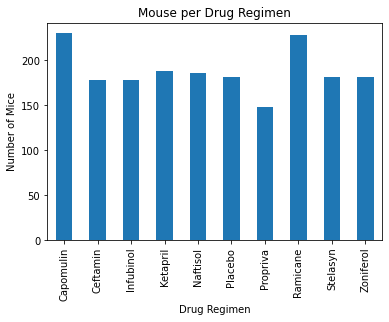

In [145]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
total_mice.plot(kind='bar')
plt.title("Mouse per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

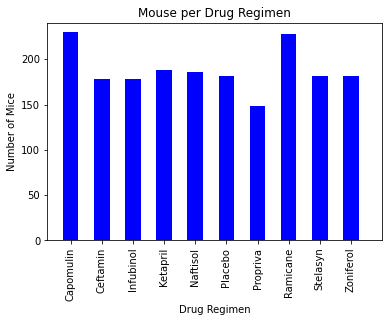

In [133]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
           "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(regimen))
plt.bar(x_axis, mice, color="b", width=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen, rotation='vertical')

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice)+10)

plt.title("Mouse per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

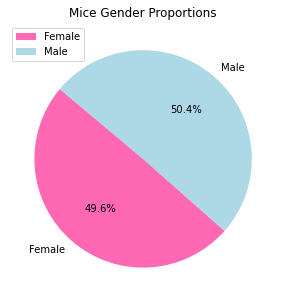

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_mouse_df.groupby(["Sex", "Mouse ID"]).size()
gender_pie = pd.DataFrame(gender.groupby(["Sex"]).count())
gender_pie.columns = ["Total Count"]
#sex = ["Female", "Male"]
#count = [123, 125]
colors = ["hotpink", "lightblue"]
gender_pie.groupby(["Sex"]).sum().plot(kind='pie', y= "Total Count", startangle=140, figsize=(5,5), colors= colors, autopct='%1.1f%%')
plt.legend(loc= "upper left")
plt.title("Mice Gender Proportions")
plt.ylabel("")
plt.show()

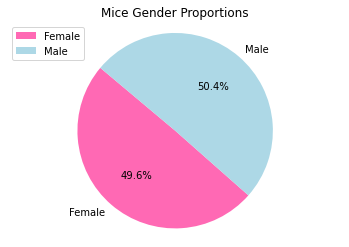

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
count = [123, 125]
colors = ["hotpink", "lightblue"]

plt.pie(count, labels=sex, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.legend(loc="upper left")
plt.title("Mice Gender Proportions")
plt.show()

## Quartiles, Outliers and Boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_complete = clean_mouse_df.set_index("Drug Regimen").loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:].sort_values("Mouse ID")
mouse_complete

# Mouse IDs
ID=mouse_complete["Mouse ID"].unique() 

final_tumor_size=[]
Regimen=[]
for i in ID:
    greatest_time_point=mouse_complete.loc[mouse_complete["Mouse ID"]==i].sort_values(by='Timepoint',ascending=False)
   
    final_tumor=round(greatest_time_point.iloc[0,2],2)
    final_tumor_size.append(final_tumor)
    
    Regimen.append(greatest_time_point.reset_index().iloc[0,0])
    
#create a new dataframe for the 4 specific treatments and final tumor size in each treament for each mice.
FTS=pd.DataFrame({"Mouse ID":ID,"Drug Regimen":Regimen,"Final Tumor Size":final_tumor_size})
FTS
FTS_index=FTS.set_index("Mouse ID").sort_values("Drug Regimen")
FTS_index

,Drug Regimen,Final Tumor Size
Mouse ID,,
l897,Capomulin,38.85
j119,Capomulin,38.13
j246,Capomulin,38.75
u364,Capomulin,31.02
g316,Capomulin,40.16
...,...,...
j913,Ramicane,31.56
j989,Ramicane,36.13
k403,Ramicane,22.05


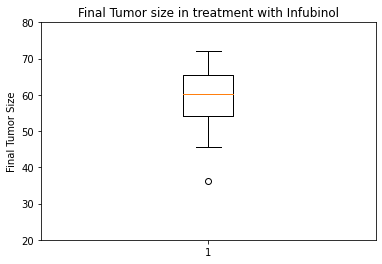

There are 1 outliers in the Final Tumor Size for the mice on Infubinol regimen are 


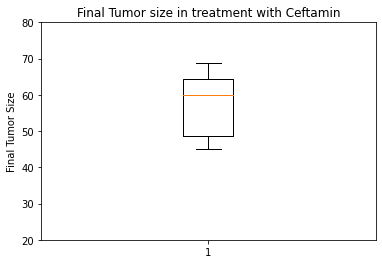

There are 0 outliers in the Final Tumor Size for the mice on Ceftamin regimen are 


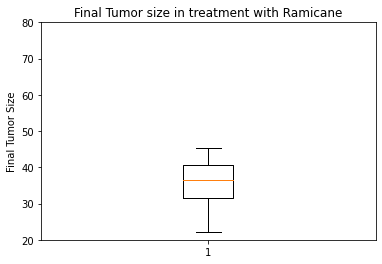

There are 0 outliers in the Final Tumor Size for the mice on Ramicane regimen are 


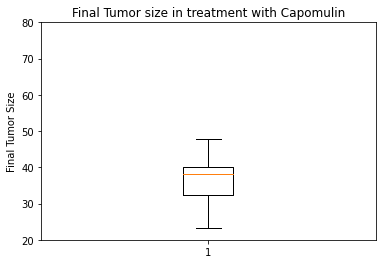

There are 0 outliers in the Final Tumor Size for the mice on Capomulin regimen are 


In [240]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = FTS["Drug Regimen"].unique()
tumorsize = pd.DataFrame({regimen_list[0]:[],
                         regimen_list[1]:[],
                         regimen_list[2]:[],
                         regimen_list[3]:[]})
tumorsize

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for d in regimen_list:
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    FTS_sorted=FTS.loc[FTS['Drug Regimen']==d].sort_values('Final Tumor Size')
    quartiles=FTS_sorted['Final Tumor Size'].quantile([.25,.5,.75])
    lower=quartiles[.25]
    upper=quartiles[.75]
    IQR=upper-lower
    tumor_vol.append(FTS_sorted['Final Tumor Size'])
#     tumor_df.loc[:,d]=[tumor_vol_data]
    plt.boxplot(FTS_sorted['Final Tumor Size'])
    plt.title(f'Final Tumor size in treatment with {d}')
    plt.ylabel('Final Tumor Size')
    plt.ylim(20,80)
    plt.show()
    outliers= FTS_sorted.loc[(FTS_sorted['Final Tumor Size']>1.5*IQR+upper) | (FTS_sorted['Final Tumor Size']<lower-1.5*IQR)]
    print(f"There are {len(outliers)} outliers in the Final Tumor Size for the mice on {d} regimen are " )
    

In [243]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = tumor_vol
fig1, ax1 = plt.subplots
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('Final Tumor Volume by Drugs')
plt.show()

TypeError: cannot unpack non-iterable function object

## Line and Scatter Plots

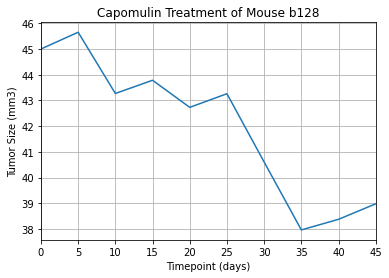

In [251]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_time = clean_mouse_df.set_index("Drug Regimen").loc['Capomulin',:].sort_values(["Mouse ID","Timepoint"])
capomulin_time

mouse1 = capomulin_time.iloc[0,0]
mouse1

capomulin_mouse_df = capomulin_time.loc[capomulin_time.iloc[:,0]==mouse1,:]
x_axis = capomulin_mouse_df.iloc[:,1]
tvol = capomulin_mouse_df.iloc[:,2]
plt.plot(x_axis,tvol)
plt.xlim(0,45)
plt.grid()
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Size (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

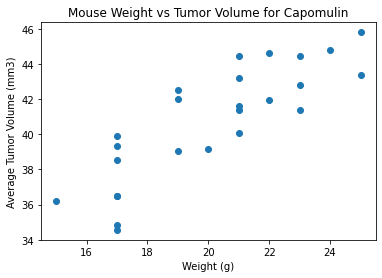

In [261]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
cap_avg = cap_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


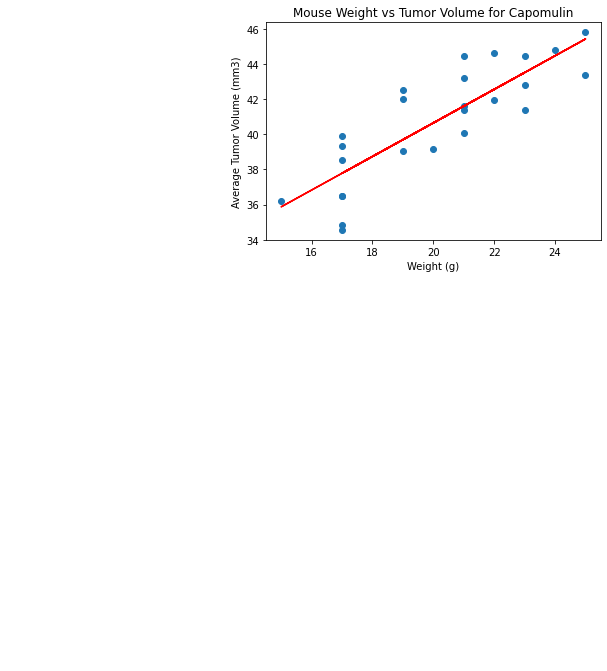

In [263]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Co-Eff
corr_coeff = round(st.pearsonr(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_coeff}")

# Linear Regression Model
x_values = cap_avg["Weight (g)"]
y_values = cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()
